# 感知机与人工神经网络

本实验使用MindSpore实现感知机与人工神经网络的搭建，包括单个感知机、单层感知机、多层感知机和神经网络。结合课程学习，通过本实验可以了解感知机的构建过程和人工神经网络的前向输出过程，并且掌握使用MindSpore深度学习框架完成感知机的构建和人工神经网络的简单实现。

## 1 感知机的基本实现

感知机作为神经网络（深度学习）的起源算法，是神经网络和深度学习的基础。感知机内依照神经元的个数、层数可分为三类：单个感知机、单层感知机和多层感知机。

### 1.1 单个感知机

如下图所示为一个接收两个输入信号的单个感知机。$x_1$、$x_2$是输入信号，$y$是输出信号，$w_1$、$w_2$是权重，$b$是偏置，$h()$是激活函数。

<div align=center>
<img src="./images/单个感知机.jpg" width="30%" height="30%" />
</div>

运行原理公式表示如下：

$$h(x)=\begin{cases}0 & \text{if } x ≤ 0 \\ 1 & \text{if } x > 0 \end{cases}$$

$$y = h(b + w_1x_1 + w_2x_2)$$

#### 1.1.1 阶跃函数

感知机所用的激活函数$h(x)$为阶跃函数。示例代码如下：

In [1]:
def step(x):
    y = x > 0
    return y.astype(np.int32)

代码中的$x$为张量，对`Tensor`进行不等号运算后，张量的各个元素都会进行不等号运算，生成一个布尔型张量，但是我们想要阶跃函数输出的是`int`型的0或1。因此，用`astype()`方法把张量y的元素类型从布尔型转换为`int`型，使`True`转换为1，`False`转换为0。

下面我们来画一下阶跃函数的图（从视觉上确认函数的形状对理解函数而言很重要），需要使用matplotlib库，示例代码如下：

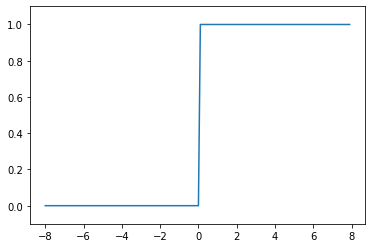

In [2]:
from mindspore import Tensor
from mindspore import dtype
import numpy as np
import matplotlib.pylab as plt

x = Tensor(np.arange(-8.0, 8.0, 0.1), dtype.float32)
y = step(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

`Tensor(np.arange(-8.0, 8.0, 0.1))`在−8.0到8.0的范围内，以0.1为单位，生成张量[-8.0,-7.9,···,7.9]。`step()`以该张量为参数，对数组的各个元素执行阶跃函数运算，并以数组形式返回运算结果。

#### 1.1.2 单个感知机的实现

现在，我们构建单个感知机，实现简单逻辑电路中的与门，并确认输出结果是否满足要求。

我们定义了一个接收参数$x_1$和$x_2$的AND函数。在函数内初始化参数$w_1$、$w_2$、$b$，并用`mindspore.numpy.sum()`实现对权重$w$和输入$x$做乘积运算再计算总和。最后再把偏置加到这个加权总和上得到结果$y$。`step()`是阶跃函数，通过它对$y$进行判断，使得当$y$大于0时返回1，否则返回0。如此一来，我们就实现了与门。示例代码如下：

In [3]:
from mindspore import Tensor
from mindspore import dtype
import mindspore
import numpy as np


# 定义激活函数
def step(x):
    return np.array(x > 0, dtype=np.int_)


def AND(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w = Tensor(np.array([0.3, 0.3]), dtype.float32)  # 设定权重
    b = -0.5  # 设定偏置
    y = mindspore.numpy.sum(w*x) + b
    return step(y)


print(AND(0, 0))  # 输出0
print(AND(0, 1))  # 输出0
print(AND(1, 0))  # 输出0
print(AND(1, 1))  # 输出1

0
0
0
1


结果和我们预想的输出一样。

实现与门、与非门、或门的感知机结构是一样的。实际上，三者的区别只在于权重参数的值不同。也就是说，相同构造的单个感知机，只需通过适当地调整参数的值，就可以在三个逻辑门之间自由转换。因此，这里我们只给出与门的实现例子，同学们可以尝试自己搭建感知机去实现其他两个逻辑门。

### 1.2 单层感知机

在单个感知机的基础上，增加多个神经元构成一层，即形成单层感知机。相较于单个感知机，在输入不变的情况下，可以产生多个并列输出。单层感知机的构造图如下所示。

<div align=center>
<img src="./images/单层感知机.jpg" width="35%" height="35%" />
</div>

> 这里举例的单层感知机只包含了两个神经元，事实上，在单层感知机中对于所包含的神经元个数是没有限制的，我们可以在该层中增加无数个神经元，即可生成无数个输出。

下面我们来演示在接受2个输入信号的情况下，使用单层感知机同时实现与非门和或门。这里我们设置$y1$为与非门输出，$y2$为或门输出，示例代码如下：

In [4]:
from mindspore import Tensor
from mindspore import dtype
import numpy as np
import mindspore

x1, x2 = 1, 1

#定义激活函数
def h(x):
    return np.array(x > 0, dtype=np.int_)


def NAND(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w1 = Tensor(np.array([-0.5, -0.5]), dtype.float32)
    b1 = -0.5
    y1 = mindspore.numpy.sum(w1*x) + b1
    return h(y1)


def OR(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w = Tensor(np.array([0.5, 0.5]), dtype.float32)
    b = -0.4
    y2 = mindspore.numpy.sum(w*x) + b
    return h(y2)


print(NAND(x1, x2))  # 输出1
print(OR(x1, x2))  # 输出0

0
1


上例中我们用AND函数计算与门神经元的输出$y1$，用NAND函数计算与非门神经元的输出$y2$，它们在接受同一个输入$x1$，$x2$的情况下，根据各自权重和偏置的不同可以得到不同的输出。

> 我们这里设置($x1$, $x2$)默认值为(1, 1)，通过手动修改其为(0, 1)、(1, 0)、(0, 0)即可分别观察到两个门电路在接受到其他三种输入时的输出情况。

### 1.3 多层感知机的实现

下面我们用一个例子来介绍多层感知机，其结构如下图所示。这里，我们将激活函数$h()$放进了神经元中，表示在神经元里先对输入进行求和再通过激活函数输出。我们将最左边的一列称为第0层，中间的一列称为第1层，最右边的一列称为第2层。

<div align=center>
<img src="./images/多层感知机.jpg" width="50%" height="50%" />
</div>

下面我们试着搭建一个多层感知机模型来实现异或门。调用实现或门、与非门、与门的`OR`函数、`NAND()`函数、`AND()`函数就可以像下面这样轻松实现，示例代码如下：

In [5]:
from mindspore import Tensor
from mindspore import dtype
import mindspore
import numpy as np

x1, x2 = 0, 1


def h(x):
    return np.array(x > 0, dtype=np.int_)


def OR(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w1 = Tensor(np.array([0.5, 0.5]), dtype.float32)
    b1 = -0.4
    y1 = mindspore.numpy.sum(w1*x) + b1
    return h(y1)


def NAND(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w2 = Tensor(np.array([-0.5, -0.5]), dtype.float32)
    b2 = 0.7
    y2 = mindspore.numpy.sum(w2*x) + b2
    return h(y2)


def AND(x1, x2):
    x = Tensor(np.array([x1, x2]), dtype.float32)
    w3 = Tensor(np.array([0.3, 0.3]), dtype.float32)
    b3 = -0.5
    y3 = mindspore.numpy.sum(w3*x) + b3
    return h(y3)


def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    return y


print(XOR(x1, x1))  # 输出0
print(XOR(x1, x2))  # 输出1
print(XOR(x2, x1))  # 输出1
print(XOR(x2, x2))  # 输出0

0
1
1
0


这样，异或门的实现就完成了。

## 2 人工神经网络的简单实现

神经网络相较于感知机，有一个重要优势是它可以自动地从数据中学习到合适的权重参数。实际上，就神经元的连接方式及信号的传递过程而言，二者没有任何差异，唯一的区别在于激活函数。在感知机的领域，激活函数就只有阶跃函数，而如果将阶跃函数换成其他诸如sigmoid函数（后述）等激活函数，就进入了神经网络的领域。

### 2.1 神经网络中的激活函数

#### 2.1.1 sigmoid函数

神经网络中经常使用的一个激活函数就是sigmoid函数。

下面，我们来实现sigmoid函数。MindSpore中有已经封装好的[mindspore.ops.Exp](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/ops/mindspore.ops.Exp.html#mindspore.ops.Exp)函数类，我们在对它进行实例化后便可对Tensor实现`exp()`操作。运行下面程序将绘制出sigmoid函数的曲线。

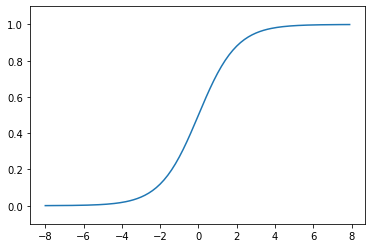

In [6]:
import mindspore
from mindspore import Tensor
from mindspore import dtype
import numpy as np
import matplotlib.pylab as plt

exp = mindspore.ops.Exp()


def sigmoid(x):
    return 1 / (1 + exp(-x))


x = Tensor(np.arange(-8.0, 8.0, 0.1), dtype.float32)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

#### 2.1.2 ReLU函数

在激活函数中，除了sigmoid函数以外，被广泛使用的还有ReLU函数。

同样的，MindSpore中有已经封装好的函数类[mindspore.ops.Maximum()](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/ops/mindspore.ops.Maximum.html#mindspore.ops.Maximum)，对其实例化后即可调用。maximum()函数会从输入的数值中选择较大的那个值进行输出，通过它我们就能实现ReLU函数。运行下列代码我们可绘制出ReLU函数曲线。

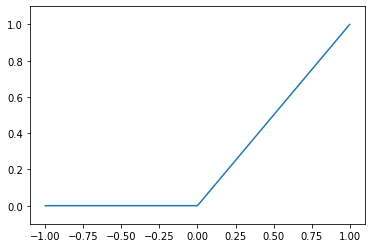

In [7]:
import mindspore
from mindspore import Tensor
from mindspore import dtype
import numpy as np
import matplotlib.pylab as plt

maximum = mindspore.ops.Maximum()

x = Tensor(np.arange(-1.0, 1.1, 0.1), dtype.float32)
y = maximum(0, x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

在神经网络中应用的激活函数，除了我们上述介绍的两种函数外，还有许多其他的激活函数。这里由于sigmoid函数的泛用性，我们剩余部分的实验将选择sigmoid函数作为激活函数进行演示。

### 2.2 实现步骤

现在我们来实现神经网络。这里我们以下图的3层神经网络为例，实现从输入到输出的（前向）处理。

<div align=center>
<img src="./images/三层神经网络.jpg" width="60%" height="60%" />
</div>

> 3层神经网络：输入层（第0层）有2个神经元，第1个隐含层（第1层）有3个神经元，第2个隐含层（第2层）有3个神经元，输出层（第3层）有2个神经元。

1. 加载MindSpore模块

首先导入MindSpore API和numpy，代码如下：

In [8]:
import mindspore
from mindspore import Tensor, nn
from mindspore import dtype
import numpy as np

2. 定义神经网络的权重和偏置

示例代码如下：

In [9]:
def init_network():
    network = {}
    network['w1'] = Tensor(np.random.normal(0, 1, [3, 2]), dtype.float32)
    network['b1'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w2'] = Tensor(np.random.normal(0, 1, [3, 3]), dtype.float32)
    network['b2'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w3'] = Tensor(np.random.normal(0, 1, [2, 3]), dtype.float32)
    network['b3'] = Tensor(np.random.normal(0, 1, [2]), dtype.float32)
    return network

`init_network()`函数的作用是进行定义神经网络的权重和偏置，并把它们保存在一个字典变量$network$中。这里用`np.random.normal()`函数将权重设置为满足均值为0，标准差为1的正态分布的2*3`Tensor`，偏置则为满足均值为0，标准差为1的正态分布的1维`Tensor`。

> 在我们之后采用的`Dense`算子中，其内部的sigmoid函数规定了输入数据类型为float16或float32的任意维度的`Tensor`，因此在本小节中我们定义权重、偏置等各参数时均规定它们的数据类型为`float32`。

3. 定义网络模型

定义三层神经网络模型的结构，由于我们构建的网络具有三个全连接层，因此我们可以使用`mindspore`的提供全连接层算子[nn.Dense](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/nn/mindspore.nn.Dense.html#mindspore.nn.Dense)。其参数如下：

- `in_channels`：Dense层输入Tensor的空间维度。

- `out_channels`：Dense层输出Tensor的空间维度。

- `weight_init`：权重参数的初始化方法。数据类型与输入相同。默认值：’normal’。

- `bias_init`：偏置参数的初始化方法。数据类型与输入相同。默认值：’zeros’。

- `has_bias`：是否使用偏置向量 bias 。默认值：True。

- `activation`：应用于全连接层输出的激活函数，例如‘sigmoid’。默认值：None。

> 除了`nn.Dense`外，`mindspore.nn`模块中还提供了卷基层（`nn.Conv2d`）、池化层（`nn.MaxPool2d`）等算子，详情可参考[API文档](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/mindspore.nn.html)。

示例代码如下：

In [10]:
class Net(nn.Cell):
    def __init__(self):
        super(Net, self).__init__()
        network = init_network()
        w1, w2, w3 = network['w1'], network['w2'], network['w3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']
        self.fc1 = nn.Dense(2, 3, w1, b1, True, 'sigmoid')
        self.fc2 = nn.Dense(3, 3, w2, b2, True, 'sigmoid')
        self.fc3 = nn.Dense(3, 2, w3, b3, True)

    def construct(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

MindSpore的[Cell](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/nn/mindspore.nn.Cell.html?highlight=cell)类是构建所有网络的基类，也是网络的基本单元。当我们需要自定义网络时，需要继承`Cell`类，并重写`__init__`方法和`construct`方法。

在我们定义的`Net`模型类中，在`__init__()`函数中完成了模型参数初始化及各个层所需要用到算子的定义。在我们定义的`nn.Dense`层中，实现了权重和偏置的初始化，并对输入张量进行线性变换。

`self.fc1`和`self.fc2`分别表示第一个隐含层和第二个隐含层，采用的激活函数为sigmoid，`self.fc3`表示输出层，采用的激活函数默认为None，等同于恒等函数。

`construct()`函数就是把我们在初始化函数中导入的算子按顺序放置，实现层之间的连接关系，同时负责接收输入信号，根据定义对输入进行逐层操作，最后返回计算结果，实现神经网络的前向传播。

4. 创建网络并实现前向传播

这里，我们将输入信号$input$设置为二维张量[[1.0， 2.0]]，不直接设为一维是因为`nn.Dense`算子要求输入张量维数至少为二。同时，我们将前面构造的$Net$类实例化，并传入$input$即可实现神经网络前向传播。

In [11]:
input = Tensor(np.array([[1.0, 2.0]]), dtype.float32)
model = Net()
output = model(input)
print(output)

[[2.9480772 3.238216 ]]


### 2.3 代码总结

现在我们把之前各个流程的代码整理一下，可以得到完整的实现代码如下所示。

In [12]:
import mindspore
from mindspore import Tensor, nn
from mindspore import dtype
import numpy as np


def init_network():
    network = {}
    network['w1'] = Tensor(np.random.normal(0, 1, [3, 2]), dtype.float32)
    network['b1'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w2'] = Tensor(np.random.normal(0, 1, [3, 3]), dtype.float32)
    network['b2'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w3'] = Tensor(np.random.normal(0, 1, [2, 3]), dtype.float32)
    network['b3'] = Tensor(np.random.normal(0, 1, [2]), dtype.float32)
    return network


class Net(nn.Cell):
    def __init__(self):
        super(Net, self).__init__()
        network = init_network()
        w1, w2, w3 = network['w1'], network['w2'], network['w3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']
        self.fc1 = nn.Dense(2, 3, w1, b1, True, 'sigmoid')
        self.fc2 = nn.Dense(3, 3, w2, b2, True, 'sigmoid')
        self.fc3 = nn.Dense(3, 2, w3, b3, True)

    def construct(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


input = Tensor(np.array([[1.0, 2.0]]), dtype.float32)
model = Net()
output = model(input)
print(output)

[[ 0.29432645 -1.2654278 ]]


自此，通过巧妙地使用MindSpore框架，我们高效地实现了一个三层神经网络。

> 这里我们只是实现了神经网络的前向输出，在之后课程中，通过对模型训练方法的掌握，我们就可以通过对神经网络模型进行训练，使模型输出我们需要的值，如此一来，我们就可以使用神经网络来实现各种AI任务。

## 3 实验任务

对前述的3层神经网络进行手动实现，过程中要求不采用`Dence`算子而采用基本的矩阵乘法算子`mindspore.ops.matmul`。输入信号设置为默认值[1.0， 2.0]，用`numpy`中的`np.random.normal()`函数将权重设置为满足均值为0，标准差为1的正态分布的2*3`Tensor`，偏置则为满足均值为0，标准差为1的正态分布的1维`Tensor`。

### 参考答案

1. 分步骤实现

首先加载实验所需的模块。

In [14]:
import mindspore
from mindspore import Tensor
from mindspore import dtype
import numpy as np

接下来实现从输入层到第1个隐含层的第1个神经元的信号传递过程，如下图所示。

<div align=center>
<img src="./images/第一层信号传递.jpg" width="50%" height="50%" />
</div>

示例代码如下：

In [15]:
exp = mindspore.ops.Exp()

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + exp(-x))


x = Tensor(np.array([1.0, 2.0]), dtype.float32)
w1 = Tensor(np.random.normal(0, 1, [2, 3]), dtype.float32)
b1 = Tensor(np.random.normal(0, 1, [3]), dtype.float32)

a1 = mindspore.ops.matmul(x, w1) + b1
z1 = sigmoid(a1)

然后实现第1个隐含层到第2个隐含层的信号传递。它信号的传递过程如下图所示。

<div align=center>
<img src="./images/第二层信号传递.jpg" width="45%" height="45%" />
</div>

除了第1个隐含层的输出$Z_1$变成了第2个隐含层的输入这一点以外，这个实现和刚才的代码基本完全相同。

In [16]:
w2 = Tensor(np.random.normal(0, 1, [3, 3]), dtype.float32)
b2 = Tensor(np.random.normal(0, 1, [3]), dtype.float32)

a2 = mindspore.ops.matmul(z1, w2) + b2
z2 = sigmoid(a2)

最后是第2个隐含层到输出层的信号传递，如下图所示。这个过程的实现也和之前的实现基本一致。

<div align=center>
<img src="./images/第三层信号传递.jpg" width="45%" height="45%" />
</div>

> 输出层的激活函数$𝜎()$和之前的隐含层的激活函数$h()$有所不同。$𝜎()$为恒等函数，该函数会将输入按原样输出，因此，在这里中没有必要特意定义恒等函数，直接输出加权求和的结果就可以。

In [17]:
w3 = Tensor(np.random.normal(0, 1, [3, 2]), dtype.float32)
b3 = Tensor(np.random.normal(0, 1, [2]), dtype.float32)

a3 = mindspore.ops.matmul(z2, w3) + b3
y = a3  # 输出层的激活函数为恒等函数，因此直接输出
print(y)

[-0.15418482  1.4596719 ]


2. 代码总结

In [18]:
import mindspore
from mindspore import Tensor
from mindspore import dtype
import numpy as np


exp = mindspore.ops.Exp()


# 定义激活函数
def sigmoid(x):
    return 1 / (1 + exp(-x))


def init_network():
    network = {}
    network['w1'] = Tensor(np.random.normal(0, 1, [2, 3]), dtype.float32)
    network['b1'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w2'] = Tensor(np.random.normal(0, 1, [3, 3]), dtype.float32)
    network['b2'] = Tensor(np.random.normal(0, 1, [3]), dtype.float32)
    network['w3'] = Tensor(np.random.normal(0, 1, [3, 2]), dtype.float32)
    network['b3'] = Tensor(np.random.normal(0, 1, [2]), dtype.float32)
    return network


def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = mindspore.ops.matmul(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = mindspore.ops.matmul(z1, w2) + b2
    z2 = sigmoid(a2)
    y = mindspore.ops.matmul(z2, w3) + b3
    return y


network = init_network()
input = Tensor(np.array([1.0, 2.0]))
output = forward(network, input)
print(output)

[ 0.7527307  -0.66268176]


在代码总结这里我们定义了`init_network()`和`forward()`函数。`init_network()`函数进行神经网络权重和偏置的定义及保存。`forward()`函数实现参数的初始化并进行前向传播，它内部封装了将输入信号转换为输出信号的处理过程。至此，我们就手动实现了一个三层神经网络的构建并完成了前向传播。